In [1]:
!pip install wordcloud

Ȱ�� �ڵ� ������: 949


In [2]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
import nltk     # nltk.download() 를 하기위해, import 함.

In [4]:
nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [6]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,NaN,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
95,NaN,96,Availability modelling and assurance for a big...,"Ke, Zuqiang; Park, Nohpill",Inderscience,2019
96,NaN,97,Big Earth Data: a comprehensive analysis of vi...,"Merritt, Patrick; Bi, Haixia; Davis, Bradley; ...",John Wiley & Sons Ltd,2018
97,NaN,98,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
98,NaN,99,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017


In [7]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,NaN,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
495,NaN,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
496,NaN,97,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
497,NaN,98,New discrimination diagrams for basalts based ...,"Zhang, Qi; Sun, Weidong; Zhao, Yong; Yuan, Fan...",John Wiley & Sons Ltd,2019
498,NaN,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [8]:
all_files_data_concat.to_csv('./data/riss_bigdata.csv', encoding='utf-8', index = False)

In [9]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Call for Special Issue Papers: Big Data Analyt...
1      Call for Papers: Special Issue on Big Data in ...
2      An Exercise in Exploring Big Data for Producin...
3      Big Data in Healthcare: Opportunities and Chal...
4      Internet of Things-Based Optimized Routing and...
                             ...                        
495    Comparative study of big data of global adakit...
496    Furthest-Pair-Based Binary Search Tree for Spe...
497    New discrimination diagrams for basalts based ...
498                 Big Data 2.0: Cataclysm or Catalyst?
499                                 Big Data on Robotics
Name: 제목, Length: 500, dtype: object

In [10]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [11]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [12]:
print(words)  #출력하여 내용 확인

[['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity'], ['call', 'paper', 'special', 'issue', 'big', 'data', 'robotics'], ['exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information'], ['big', 'data', 'healthcare', 'opportunity', 'challenge'], ['internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection'], ['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence'], ['call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data'], ['research', 'dilemma', 'behavioral', 'big', 'data'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data

In [17]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence', 'call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'research', 'dilemma', 'behavioral', 'big', 'data', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'

In [18]:
count = Counter(words2)
count   #출력하여 내용 확인

Counter({'call': 41,
         'special': 44,
         'issue': 48,
         'paper': 40,
         'big': 523,
         'data': 566,
         'analytics': 99,
         'intelligent': 11,
         'system': 35,
         'cybersecurity': 2,
         'robotics': 5,
         'exercise': 2,
         'exploring': 5,
         'producing': 2,
         'reliable': 2,
         'statistical': 4,
         'information': 7,
         'healthcare': 12,
         'opportunity': 8,
         'challenge': 14,
         'internet': 12,
         'thing': 11,
         'based': 46,
         'optimized': 4,
         'routing': 2,
         'gathering': 2,
         'landslide': 2,
         'detection': 11,
         'scientific': 9,
         'machine': 20,
         'learning': 33,
         'science': 18,
         'engineering': 12,
         'ensemble': 4,
         'scalable': 16,
         'approach': 31,
         'intrusion': 2,
         'using': 30,
         'framework': 27,
         'industrial': 3,
         'int

In [19]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 566
big : 523
analytics : 99
issue : 48
based : 46
special : 44
call : 41
paper : 40
analysis : 36
system : 35
learning : 33
approach : 31
using : 30
earth : 28
framework : 27
model : 27
cloud : 21
processing : 21
machine : 20
computing : 19
management : 19
distributed : 19
science : 18
development : 18
application : 18
platform : 18
sustainable : 17
review : 17
perspective : 17
scalable : 16
editorial : 16
driven : 16
algorithm : 16
health : 15
guest : 15
challenge : 14
support : 14
goal : 14
mining : 14
survey : 14
service : 14
efficient : 14
new : 14
research : 13
deep : 13
healthcare : 12
internet : 12
engineering : 12
smart : 12
towards : 12


In [20]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [24]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [25]:
plt.rcParams["font.family"] = 'NanumGothic'

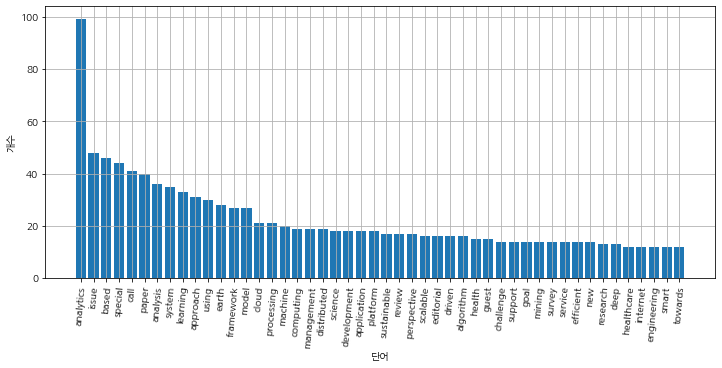

In [26]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel('단어')
plt.ylabel('개수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

In [27]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,2004,1
1,2011,1
2,2012,6
3,2013,7
4,2014,42
5,2015,47
6,2016,77
7,2017,77
8,2018,65
9,2019,40


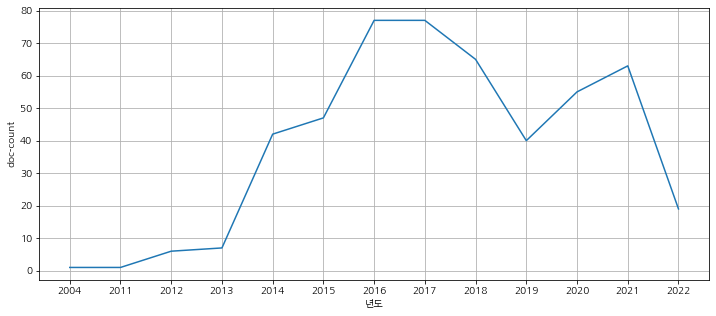

In [32]:
plt.figure(figsize=(12,5))
plt.xlabel('년도')
plt.ylabel('doc-count')
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

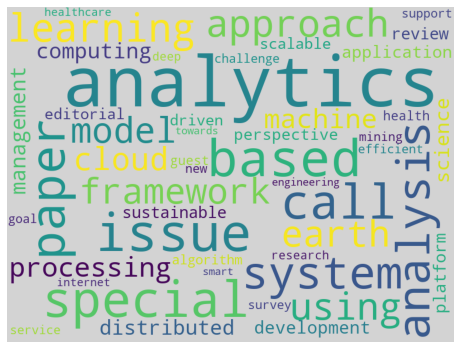

In [36]:
# word cloud
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='lightgray', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [37]:
cloud.to_file('./data/riss_bigdata_wordCloud.jpg')